<a href = "https://www.eecs.qmul.ac.uk/mmv/datasets/deap/">DEAP link</a><br>
<a href = "https://mne.tools/stable/auto_tutorials/preprocessing/25_background_filtering.html">mne link</a><br>

<tbody>
<tr><th>Array name</th><th>Array shape</th><th>Array contents</th></tr>
<tr><td>data</td><td>40 x 40 x 8064</td><td>video/trial x channel x data</td></tr>
<tr><td>labels</td><td>40 x 4</td><td>video/trial x label (valence, arousal, dominance, liking)</td></tr>
</tbody>

In [142]:
%matplotlib inline
import mne
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
from os.path import join as opj
from tqdm import tqdm

In [143]:
# ch_list = ['1_Fp1','2_AF3','3_F3','4_F7','5_FC5','6_FC1','7_C3','8_T7','9_CP5','10_CP1',
#            '11_P3','12_P7','13_PO3','14_O1','15_Oz','16_Pz','17_Fp2','18_AF4','19_Fz','20_F4',
#            '21_F8','22_FC6','23_FC2','24_Cz','25_C4','26_T8','27_CP6','28_CP2','29_P4',
#            '30_P8','31_PO4','32_O2']

In [144]:
ch_list = ['Fp1','AF3','F3','F7','FC5','FC1','C3','T7','CP5','CP1',
           'P3','P7','PO3','O1','Oz','Pz','Fp2','AF4','Fz','F4',
           'F8','FC6','FC2','Cz','C4','T8','CP6','CP2','P4',
           'P8','PO4','O2']

In [145]:
mat_dir = opj('DEAP', "data_preprocessed_matlab")
datas = []
val_labels = []
aro_labels = []

for mat_name in tqdm(os.listdir(mat_dir)):
    mat = scipy.io.loadmat(opj(mat_dir, mat_name))
    data = mat['data'] # (40,40,8064)
    label = mat['labels'] # (40,4)
    
    data = data[:, :32, 128*3:] # eeg 32채널만
    val_label = label[:, 1] # val, aro 만
    aro_label = label[:, 2]
    
    datas.append(data)
    #datas = np.concatenate((data, datas), axis = 0)
    val_labels = np.concatenate((val_label, val_labels), axis = 0) # 참가자 구분 X
    # val_labels.append(val_label)
    aro_labels.append(aro_label)


datas = np.array(datas)
val_labels = np.array(val_labels)
aro_labels = np.array(aro_labels)

# 반올림
val_labels = np.around(val_labels)
aro_labels = np.around(aro_labels)

print(datas.shape, val_labels.shape, aro_labels.shape)

100%|██████████| 32/32 [00:13<00:00,  2.45it/s]


(32, 40, 32, 7680) (1280,) (32, 40)


각 참가자 파일에는 "데이터" 배열(40개 시행 x 40개 채널 x 8064개 데이터)과 "라벨" 배열(40개 시행 x 4개 주관적 등급: 원자가, 각성, 지배, 좋아요)의 두 개의 배열이 있습니다. 
22/32 참가자(전방 비디오가 녹화된 참가자)를 대상으로 데이터 파일을 2개의 새로운 어레이와 880개의 평가판으로 결합합니다.

In [146]:
128*60

7680

In [147]:
# 모든 사람들이 첫번째 영화를 보고 찍은 라벨 -> len 32
#print("val_labels_len", len(val_labels[:,0]))
print("val_labels", val_labels)
print("aro_labels", aro_labels[:,0])
print(datas)
print(len(datas)) # 32명 63초

val_labels [7. 6. 7. ... 7. 6. 7.]
aro_labels [7. 7. 6. 8. 4. 3. 7. 5. 5. 5. 2. 7. 7. 8. 7. 7. 3. 4. 8. 3. 6. 8. 5. 9.
 6. 9. 6. 7. 8. 5. 8. 6.]
[[[[ 4.05213000e+00  2.89121020e+00 -1.77958774e+00 ... -2.82648937e+00
    -4.47722969e+00 -3.67692812e+00]
   [ 3.05326186e+00  4.12852886e+00 -1.62482336e-02 ... -2.98702069e+00
    -6.28780884e+00 -4.47429041e+00]
   [ 1.18607868e+00  4.61642327e+00  8.03398666e-01 ... -2.63707760e+00
    -7.40651010e+00 -6.75590441e+00]
   ...
   [ 2.74540878e+00  3.13796149e+00  4.58457769e+00 ...  6.68885999e+00
     6.91232131e+00  5.66901722e+00]
   [ 2.81410777e+00  3.19246696e+00  5.33090169e+00 ...  2.64017310e+00
     6.57464869e+00  7.20846274e+00]
   [ 3.66600597e+00  4.67147056e+00  5.00733153e+00 ...  2.23958511e+00
     3.18256605e+00  4.70807159e+00]]

  [[-4.52373501e+00 -1.20166250e+01 -1.27762724e+01 ...  6.02219406e+00
     7.53913583e+00  9.35224904e+00]
   [-6.38730411e-01 -4.66556641e+00 -7.28000225e+00 ...  6.03399490e+00
     9.0687

In [148]:
print(aro_labels[31, 39]) # 영화보고 val, 라벨 1개

6.0


In [149]:
import pandas as pd
# Only extract Valence and Arousal ratings
df_label_ratings = pd.DataFrame({ 'Arousal': aro_labels[:,0]})
print(df_label_ratings.describe())

         Arousal
count  32.000000
mean    6.125000
std     1.844783
min     2.000000
25%     5.000000
50%     6.500000
75%     7.250000
max     9.000000


In [150]:
pd.DataFrame(val_labels).describe()

,0
count,1280.000000
mean,5.136719
std,2.019660
min,1.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,9.000000


<AxesSubplot:>

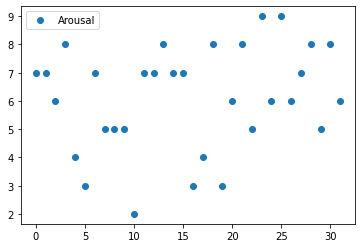

In [151]:
# Plot the first 40 data rows (first participant)
df_label_ratings.iloc[0:40].plot(style=['o','rx'])

In [152]:
print("datas.shape:",datas.shape)
print("len(datas):",len(datas))

datas.shape: (32, 40, 32, 7680)
len(datas): 32


In [153]:
len(val_labels)

1280

In [154]:
# 크기를 맞춰줘야한다. (32, 40, 32, 7680) -> (1280, 32, 7680)
datas = np.concatenate(datas, axis=0)
print("datas.shape:",datas.shape)
print("len(datas):",len(datas))


# 참고
# # (32, 40, 35, 7680)의 배열 생성
# a = np.random.rand(32, 40, 35, 7680)
# # 첫 번째 축을 연결하여 (1280, 40, 35, 7680) 배열로 변환
# b = np.concatenate(a, axis=0)
# # 축의 순서를 변경하여 (1280, 35, 40, 7680) 배열로 변환
# c = np.transpose(b, (0, 2, 1, 3))
# # (1280, 35, 7680) 배열로 변환
# d = np.reshape(c, (1280, 35, 7680))
# # 결과 확인
# print(d.shape)  # (1280, 35, 7680)

datas.shape: (1280, 32, 7680)
len(datas): 1280


In [156]:
# data split
from sklearn.model_selection import train_test_split
print("data split")
train_data, val_data,train_label, val_label = train_test_split(datas, val_labels, test_size=0.125)
x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.5)


data split


In [161]:
print(train_data, val_data,train_label, val_label)

[[[ -1.85762819 -22.02750357 -21.80708782 ...   5.11775947   4.56355711
    -2.12358438]
  [ -1.1849324    3.9898445    9.09660947 ...   1.26901801  -1.25687072
    -4.1758446 ]
  [ -4.77053404   2.40716564   3.06930869 ...   1.20055425  -1.76442718
    -5.8576318 ]
  ...
  [  8.47830799  13.01343775  11.31720702 ...  -6.14293018  -1.10712463
     8.00265949]
  [  3.10803264  -3.10333249 -12.35079152 ...  -1.55181031   1.62290956
     2.97146922]
  [  6.92545579  21.78224684  24.94205755 ...  -5.00885951  -0.27077688
     6.97526813]]

 [[ 28.76039925  25.70906435   7.92039905 ...  -2.42630779  -8.40676627
   -29.6971415 ]
  [  9.39815844  22.74733707  11.21617915 ...  -6.24176599 -11.89353126
   -69.95611371]
  [  5.55791285   9.24896612  11.91331701 ... -10.38514837 -18.92726001
   -27.91547927]
  ...
  [ -6.53391495  -5.46854898  -4.18202175 ...   0.22066878  20.66184049
    42.24826803]
  [-10.87013802  -7.6783136   -2.02721331 ...   1.84621937   2.20517491
    -6.30485745]
  [ -1.

In [160]:
# make data loader
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

print("make data loader")
target_dataset = TensorDataset(x_train, y_train)
source_dataset = TensorDataset(x_test, y_test)
val_dataset = TensorDataset(val_data, val_label)
target_dataloader = DataLoader(target_dataset, 64, shuffle=True)
source_dataloader = DataLoader(source_dataset, 64, shuffle=True)
val_dataloader = DataLoader(val_dataset, 64, shuffle=True)

make data loader


TypeError: 'int' object is not callable

밑은 X

In [ ]:
info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

---

In [ ]:
datas[0].shape

(40, 32, 7680)

In [ ]:
# e.g.
tuple_list = [([4,2,1], 0),([4,2,1], 1), ([4,2,1], 5.5), ([4,81,1], 3), ([4,2,1],5)]
sorted(tuple_list, key=lambda x : x[1]) 

[([4, 2, 1], 0),
 ([4, 2, 1], 1),
 ([4, 81, 1], 3),
 ([4, 2, 1], 5),
 ([4, 2, 1], 5.5)]

In [ ]:
sub_id = 0

unhap, hap = [], []
for eeg, val in zip(datas[sub_id], labels[sub_id,:,0]):
    if val >= 5: hap.append((eeg, val))
    else: unhap.append((eeg, val))
        
unhap.sort(key=lambda x : x[1])
hap.sort(key=lambda x : x[1])

unhap = np.array([tup[0] for tup in unhap])
hap = np.array([tup[0] for tup in hap])

unhap.shape, hap.shape

((21, 32, 7680), (19, 32, 7680))

In [ ]:
unhap = mne.EpochsArray(unhap, info)
hap = mne.EpochsArray(hap, info)
unhap.filter(4, 45)
hap.filter(4, 45)

Not setting metadata
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Setting up band-pass filter from 4 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 213 samples (1.664 sec)

Setting up band-pass filter from 4 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (fir

Number of events,19
Events,1: 19
Time range,0.000 – 59.992 sec
Baseline,off


In [ ]:
mne.channels.get_builtin_montages()

['EGI_256',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'biosemi128',
 'biosemi16',
 'biosemi160',
 'biosemi256',
 'biosemi32',
 'biosemi64',
 'easycap-M1',
 'easycap-M10',
 'mgh60',
 'mgh70',
 'standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed',
 'artinis-octamon',
 'artinis-brite23']

In [ ]:
montage = mne.channels.make_standard_montage('biosemi32', head_size='auto')

unhap.set_montage(montage)
hap.set_montage(montage)

unhap.plot_sensors(show_names=True);

TypeError: ufunc 'cos' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


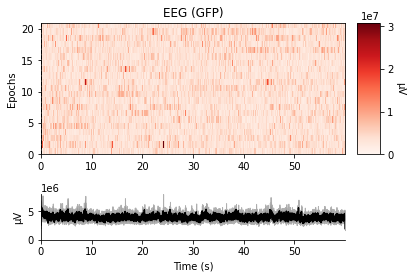

In [ ]:
unhap.plot_image();

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated


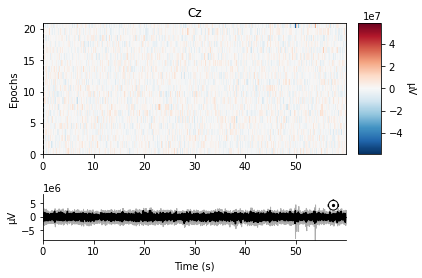

In [ ]:
unhap.plot_image(picks=['Cz']);

    Using multitaper spectrum estimation with 7 DPSS windows


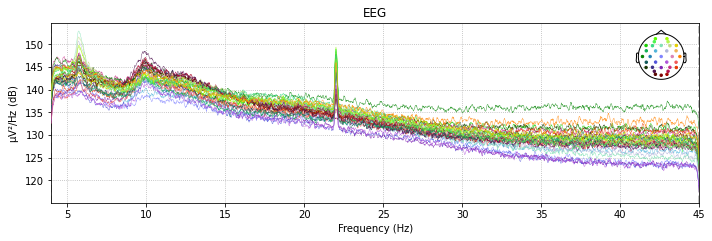

    Using multitaper spectrum estimation with 7 DPSS windows


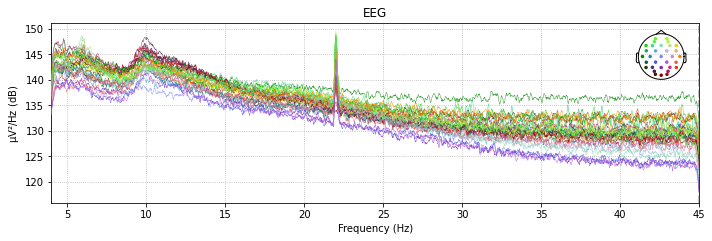

In [ ]:
unhap.plot_psd(fmin=4, fmax=45);
hap.plot_psd(fmin=4, fmax=45);

In [ ]:
hap.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF3, F3, F7, FC5, FC1, C3, T7, CP5, CP1, P3, P7, PO3, O1, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 4.0 Hz
 lowpass: 45.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 128.0 Hz
>

Using matplotlib as 2D backend.


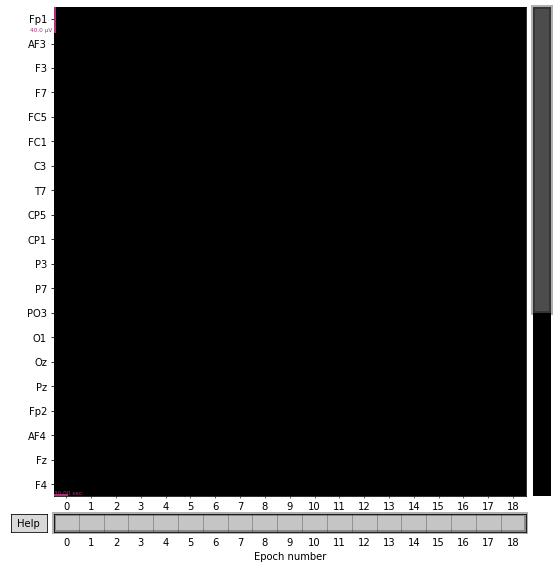

In [ ]:
# hap.plot();

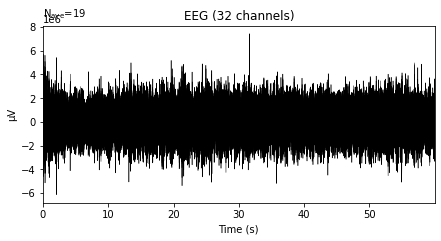

In [ ]:
hap.average().plot();

No projector specified for this dataset. Please consider the method self.add_proj.


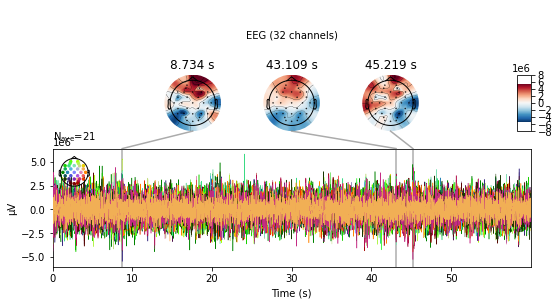

In [ ]:
unhap.average().plot_joint();

No projector specified for this dataset. Please consider the method self.add_proj.


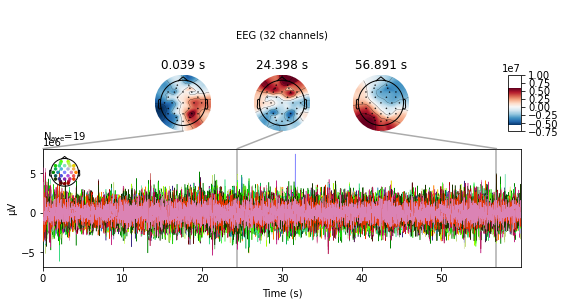

In [ ]:
hap.average().plot_joint();

## [숙제] sub01 STFT 분석하기
### mne tuto 2 참고해서